In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import seaborn as sns

# Загрузка данных

In [2]:
# %%capture
# !wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [3]:
data = pd.read_excel('data/data_ford_price.xlsx') 

## Предобработка данных

In [4]:
data = data[['price', 'year', 'weather']]
data.dropna(inplace = True)

## Масштабирование

In [5]:
data_scaled = data.copy()
col_names = ['price', 'weather']
x = data_scaled[col_names]

In [6]:
scaler = StandardScaler()
 
data_scaled[col_names] = scaler.fit_transform(x.values)
data_scaled

,price,year,weather
0,2.558728,2016,0.862068
1,0.067373,2009,-0.017965
2,-1.072197,2002,-0.897998
3,-1.176990,2000,-0.395122
5,-0.677579,2003,-0.269403
...,...,...,...
7012,0.682100,2015,0.862068
7013,-0.767025,2005,-0.269403
7014,-0.414149,2006,0.862068
7015,-0.335138,2011,-0.646560


In [7]:
y = data_scaled['year']
x = data_scaled.drop(columns='year')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 3.041


**Задание 5.2**

Отмасштабируйте признак price с помощью RobustScaler.
В качестве ответа запишите результат выполнения кода data['price'][1]

<AxesSubplot: xlabel='price', ylabel='Density'>

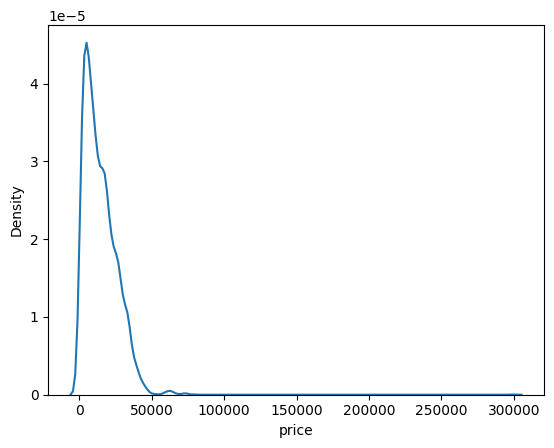

In [16]:
sns.kdeplot(data.price)

In [28]:
r_scaler = RobustScaler()

data[['price']] = r_scaler.fit_transform(data[['price']])


round(data['price'][1], 2)

0.19

<AxesSubplot: xlabel='price', ylabel='Density'>

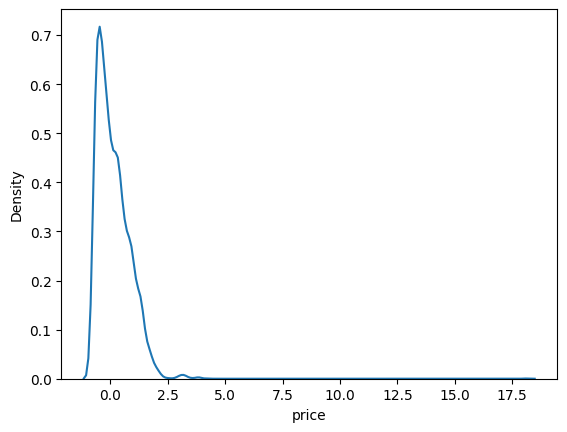

In [29]:
sns.kdeplot(data.price)